### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import joblib

### Load Data from CSV files

In [2]:
beans_df = pd.read_csv("C:/Users/Aya Hassan/Kaggel/train.csv/train.csv")
beans_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [3]:
beans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

Is There are any Null values ? 

In [4]:
beans_df.isnull().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

Is There are any Duplicates ? 

In [5]:
beans_df.duplicated().sum()

0

In [6]:
beans_df.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [7]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

    return multiple_outliers


data = beans_df.drop(detect_outliers(beans_df,['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
                                       'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
                                       'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']), axis=0).reset_index(drop=True)
print('Number of of samples in the dataset after removing outliers: %d' % len(data))

Number of of samples in the dataset after removing outliers: 9705


Dropping ID Column and Spliting datafram into Features and Label

In [8]:
beans_df = beans_df.drop('ID',axis=1)
features = beans_df.drop('y',axis=1)
label = beans_df['y']


In [9]:
label.value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

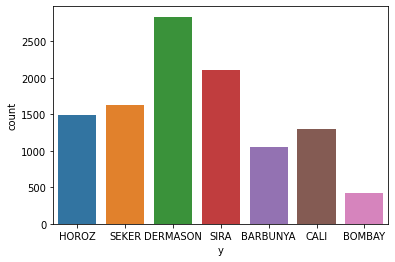

In [10]:
_ = sns.countplot(x='y', data=beans_df)

Correlation Between Features and label

<AxesSubplot:>

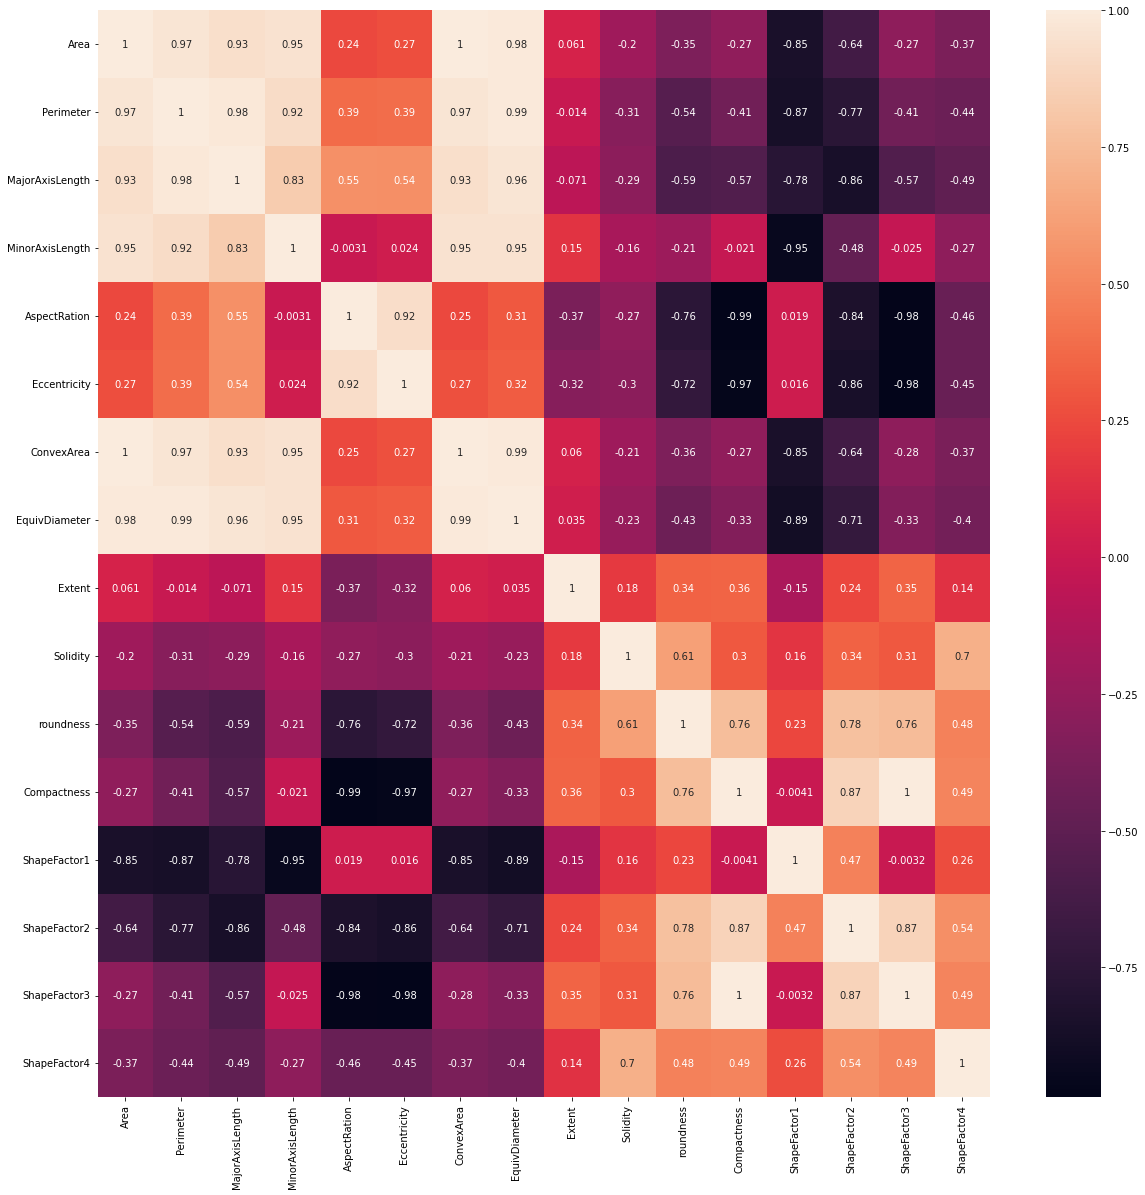

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(features.corr(), annot=True)
# plt.show()

Get more information about each Feature Destribution

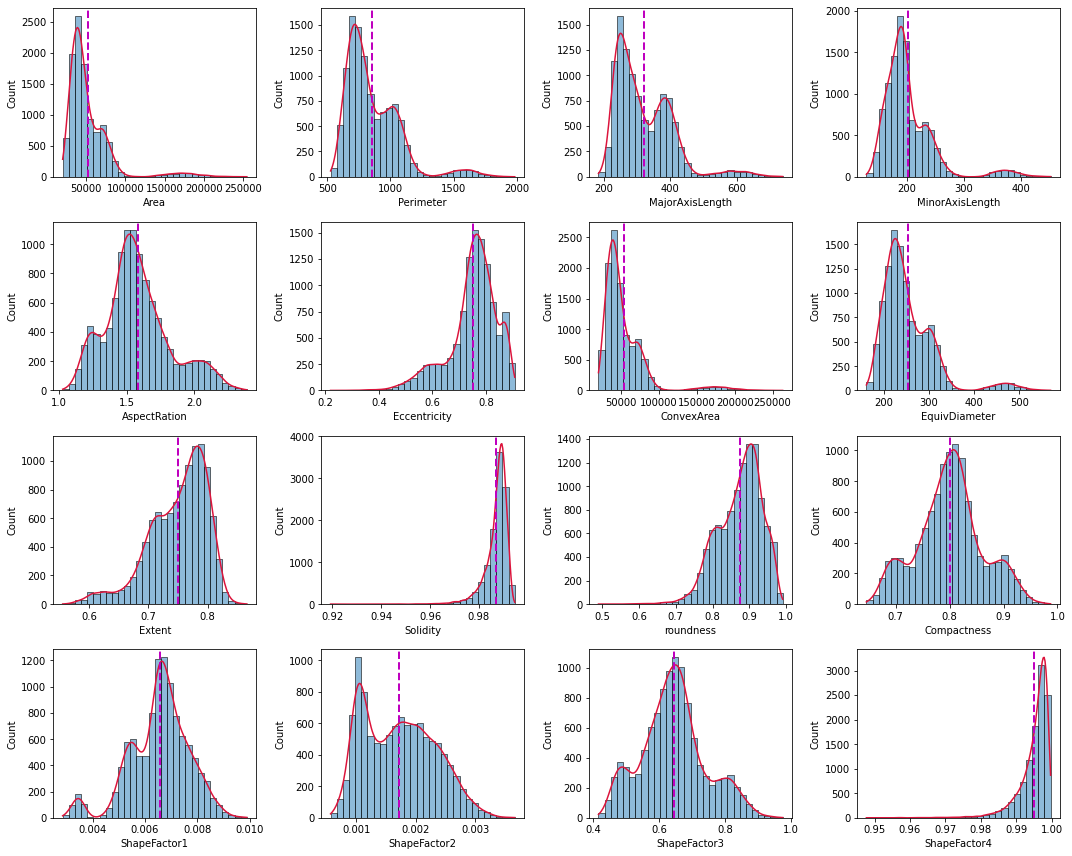

In [12]:

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(features, ax.flatten()):
    g=sns.histplot(beans_df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=beans_df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

In [13]:
# Area               
# Perimeter          
# MajorAxisLength    
# MinorAxisLength    
# AspectRation       
# Eccentricity       
# ConvexArea         
# EquivDiameter

beans_df = beans_df.drop(['Area','Perimeter','ShapeFactor3','ConvexArea','Compactness','ShapeFactor1','EquivDiameter'],axis=1)

In [14]:
beans_df.columns

Index(['MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity',
       'Extent', 'Solidity', 'roundness', 'ShapeFactor2', 'ShapeFactor4', 'y'],
      dtype='object')

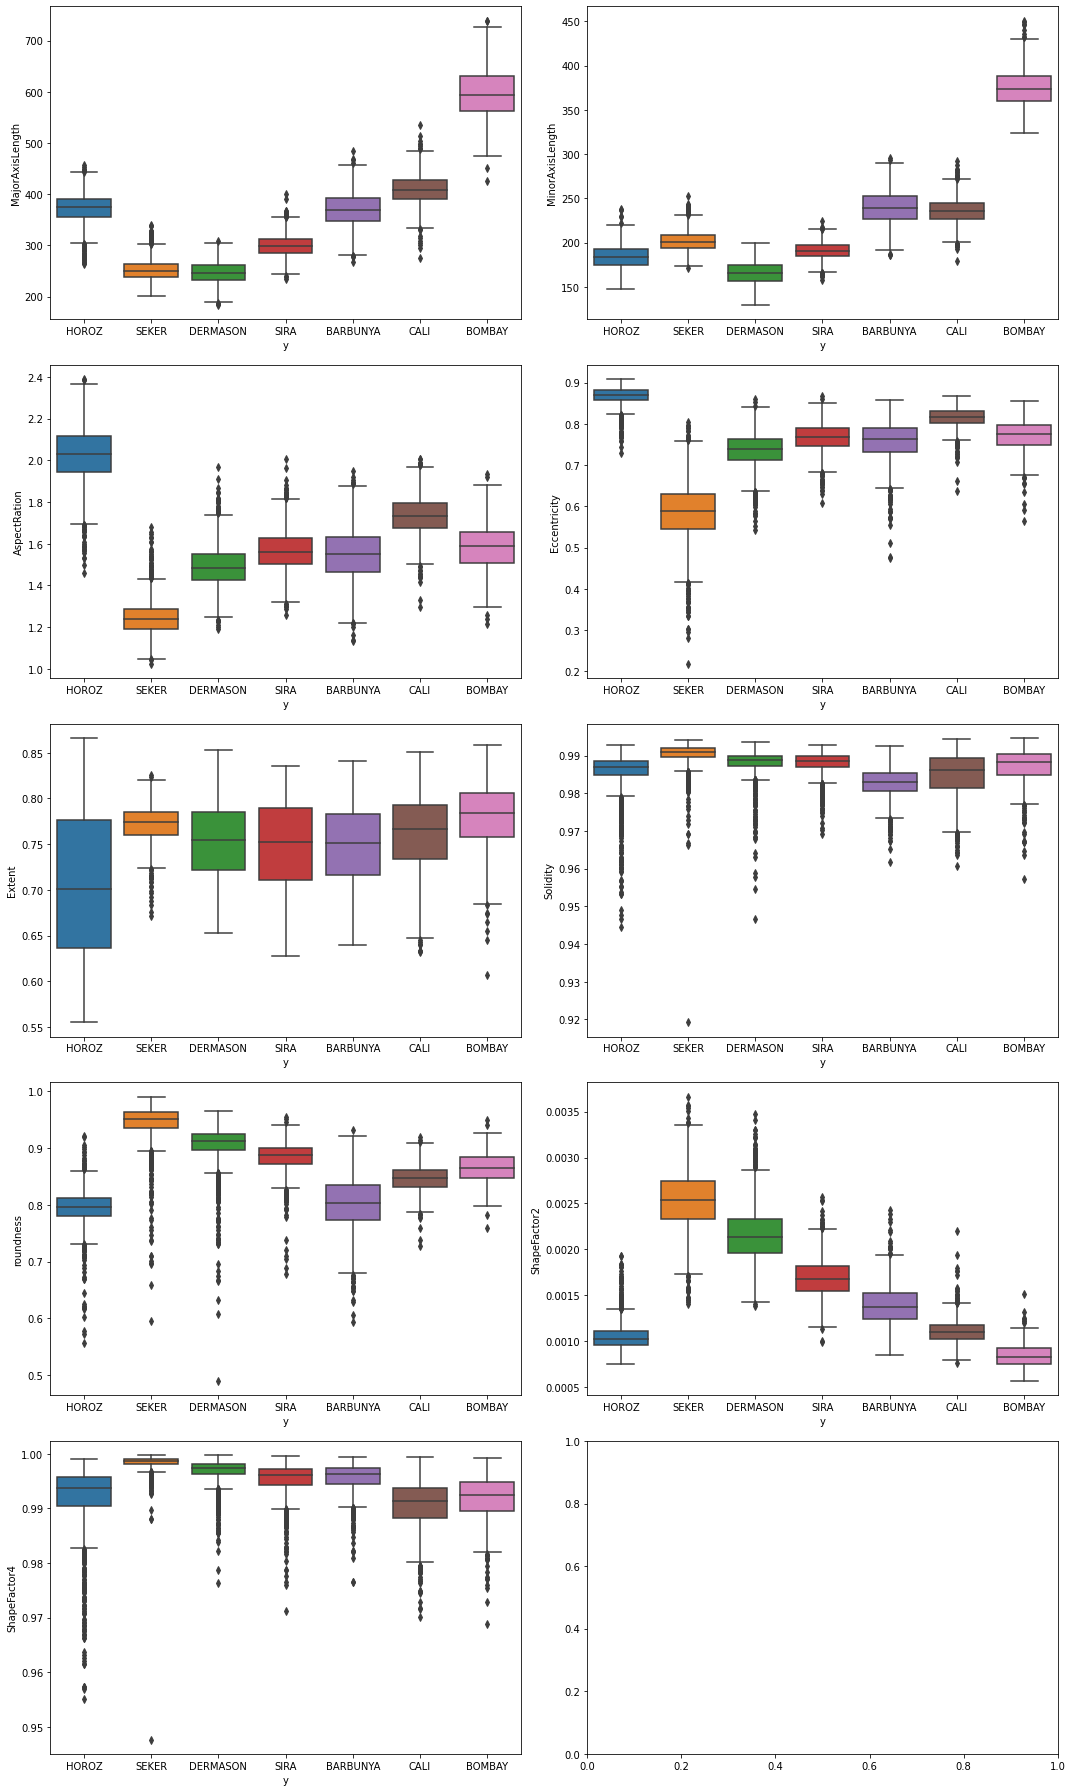

In [15]:
fig, ax = plt.subplots(5, 2, figsize=(15, 25))
features = beans_df.drop('y',axis = 1)
for variable, subplot in zip(features, ax.flatten()):
    sns.boxplot(x=beans_df['y'], y= features[variable], ax=subplot)
plt.tight_layout()

## Adjusting Dataset

### Remove outliers

In [16]:

beans_df = beans_df[beans_df['Solidity'] >= 0.94]
beans_df = beans_df[beans_df['Eccentricity'] >= 0.25]
beans_df = beans_df[beans_df['roundness'] >= 0.53]
beans_df = beans_df[beans_df['ShapeFactor4'] >= 0.96]


In [17]:
le = LabelEncoder()
beans_df['y'] = le.fit_transform(beans_df['y'])
features = beans_df.drop('y',axis = 1)
label = beans_df['y']

### Scalling Data

MinMax Scaling

In [18]:
min_max_scaler = MinMaxScaler()
scaled_features = pd.DataFrame(min_max_scaler.fit_transform(features.values))
scaled_features

,0,1,2,3,4,5,6,7,8
0,0.384688,0.178526,0.803865,0.958787,0.159036,0.846677,0.504604,0.117763,0.970260
1,0.147660,0.262615,0.147970,0.496601,0.696185,0.987337,0.962975,0.584350,0.938232
2,0.101396,0.120882,0.283949,0.687465,0.791600,0.866197,0.862111,0.557595,0.947839
3,0.152803,0.169553,0.309221,0.712638,0.678145,0.879929,0.801240,0.464513,0.987386
4,0.175795,0.198104,0.306859,0.710383,0.561313,0.867023,0.765416,0.434817,0.915670
...,...,...,...,...,...,...,...,...,...
10821,0.119896,0.196446,0.190264,0.568805,0.692242,0.891998,0.850887,0.596135,0.947070
10822,0.115581,0.112683,0.336027,0.736958,0.567714,0.855336,0.808215,0.500418,0.945445
10823,0.450667,0.348377,0.559998,0.876492,0.696994,0.928469,0.690128,0.141273,0.860894
10824,0.226990,0.216927,0.379968,0.772316,0.391428,0.866821,0.761523,0.341793,0.870849


Normalize Data

In [19]:
normalized_features = pd.DataFrame(normalize(features))
normalized_features

,0,1,2,3,4,5,6,7,8
0,0.904776,0.425838,0.004840,0.002010,0.001378,0.002249,0.001767,0.000002,0.002275
1,0.778708,0.627350,0.003639,0.001737,0.002263,0.002915,0.002858,0.000007,0.002924
2,0.818417,0.574563,0.004859,0.002429,0.002734,0.003372,0.003176,0.000008,0.003404
3,0.824728,0.565480,0.004481,0.002236,0.002354,0.003039,0.002779,0.000006,0.003070
4,0.824154,0.566321,0.004265,0.002129,0.002139,0.002897,0.002605,0.000006,0.002920
...,...,...,...,...,...,...,...,...,...
10821,0.792201,0.610215,0.004111,0.002019,0.002440,0.003134,0.002932,0.000008,0.003159
10822,0.831090,0.556076,0.005013,0.002493,0.002455,0.003313,0.003044,0.000007,0.003346
10823,0.873712,0.486414,0.003617,0.001673,0.001555,0.001996,0.001724,0.000002,0.002003
10824,0.840873,0.541191,0.004219,0.002078,0.001839,0.002684,0.002409,0.000004,0.002702


### Building AdaBoost Classifier Model

##### Baseline Model

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)
ada_boost= AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = ada_boost.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy = %f"%(accuracy_score(y_test, y_pred)))
# Accuracy = 0.748693

Number of mislabeled points out of a total 3248 points : 1007
Accuracy = 0.689963


Precision , Recall , F-score

In [21]:
print("Precision , Recall , F-score : ")
precision_recall_fscore_support(y_test, y_pred, average='macro')

Precision , Recall , F-score : 


C:\Users\Aya Hassan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.642928818786219, 0.6884456114960235, 0.6405624711729152, None)

C:\Users\Aya Hassan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


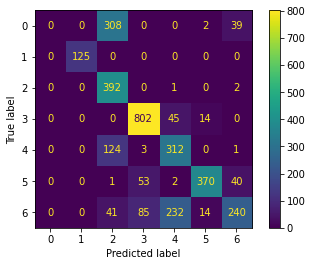

In [22]:
plot_confusion_matrix(ada_boost, X_test, y_test)  

### Normalized Features

In [23]:
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(normalized_features, label, test_size=0.3, random_state=0)
ada_boost= AdaBoostClassifier(n_estimators=300, random_state=0)
y_pred_normalized = ada_boost.fit(X_train_normalized, y_train_normalized).predict(X_test_normalized)

print("Number of mislabeled points out of a total %d points : %d"% (X_test_normalized.shape[0], (y_test_normalized != y_pred_normalized).sum()))
print("Accuracy = %f"%(accuracy_score(y_test_normalized, y_pred_normalized)))
# Accuracy = 0.636112

Number of mislabeled points out of a total 3248 points : 1213
Accuracy = 0.626539


In [24]:
print("Precision , Recall , F-score : ")
precision_recall_fscore_support(y_test_normalized, y_pred_normalized, average='macro')

Precision , Recall , F-score : 


C:\Users\Aya Hassan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.6294750325997691, 0.6223033939398156, 0.5579011929938356, None)

C:\Users\Aya Hassan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


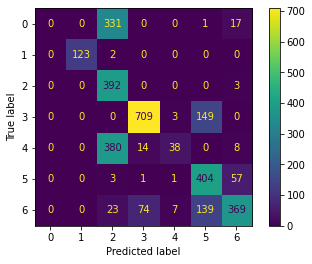

In [25]:
plot_confusion_matrix(ada_boost, X_test_normalized , y_test_normalized)  

### MinMax Scaled Features

In [26]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_features, label, test_size=0.3, random_state=0)
ada_boost= AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred_scaled = ada_boost.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)

print("Number of mislabeled points out of a total %d points : %d"% (X_test_scaled.shape[0], (y_test_scaled != y_pred_scaled).sum()))
print("Accuracy = %f"%(accuracy_score(y_test_scaled, y_pred_scaled)))

# Accuracy = 0.748693

Number of mislabeled points out of a total 3248 points : 1007
Accuracy = 0.689963


In [27]:
print("Precision , Recall , F-score : ")
precision_recall_fscore_support(y_test_scaled, y_pred_scaled, average='macro')

Precision , Recall , F-score : 


C:\Users\Aya Hassan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.642928818786219, 0.6884456114960235, 0.6405624711729152, None)

C:\Users\Aya Hassan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


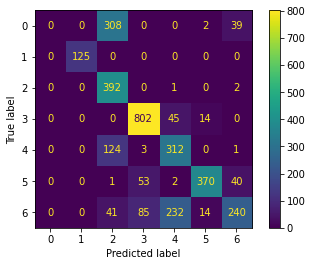

In [28]:
plot_confusion_matrix(ada_boost, X_test_scaled, y_test_scaled)  

### Building Random Forest Classifier Model

Baseline Model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)
rfc= RandomForestClassifier(max_depth=10, random_state=0)
y_pred = rfc.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy = %f"%(accuracy_score(y_test, y_pred)))
# Accuracy = 0.918794
# Accuracy = 0.921490

Number of mislabeled points out of a total 3248 points : 255
Accuracy = 0.921490


In [30]:
print("Precision , Recall , F-score : ")
precision_recall_fscore_support(y_test, y_pred, average='macro')

Precision , Recall , F-score : 


(0.9369678537968903, 0.9326642142077535, 0.9345108714668929, None)

C:\Users\Aya Hassan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Aya Hassan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


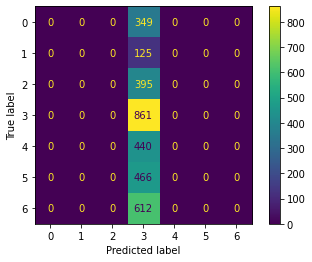

In [31]:
plot_confusion_matrix(rfc, X_test_scaled, y_test_scaled)  

Normalized Dataset

In [32]:
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(normalized_features, label, test_size=0.3, random_state=0)
rfc= RandomForestClassifier(max_depth=40, random_state=0)
y_pred_normalized = rfc.fit(X_train_normalized, y_train_normalized).predict(X_test_normalized)

print("Number of mislabeled points out of a total %d points : %d"% (X_test_normalized.shape[0], (y_test_normalized != y_pred_normalized).sum()))
print("Accuracy = %f"%(accuracy_score(y_test_normalized, y_pred_normalized)))
# Accuracy = 0.901261

Number of mislabeled points out of a total 3248 points : 302
Accuracy = 0.907020


In [33]:
print("Precision , Recall , F-score : ")
precision_recall_fscore_support(y_test_normalized, y_pred_normalized, average='macro')

Precision , Recall , F-score : 


(0.9203652984810315, 0.9158393928142138, 0.9177444502774537, None)

C:\Users\Aya Hassan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


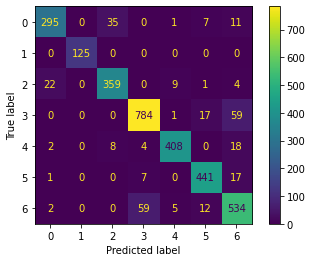

In [34]:
plot_confusion_matrix(rfc, X_test_normalized , y_test_normalized)  

MinMax Scaled Dataset

In [35]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_features, label, test_size=0.3, random_state=0)
rfc= RandomForestClassifier(max_depth=10, random_state=0)
y_pred_scaled = rfc.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)

print("Number of mislabeled points out of a total %d points : %d"% (X_test_scaled.shape[0], (y_test_scaled != y_pred_scaled).sum()))
print("Accuracy = %f"%(accuracy_score(y_test_scaled, y_pred_scaled)))
# Accuracy = 0.919102
# Accuracy = 0.921798

Number of mislabeled points out of a total 3248 points : 254
Accuracy = 0.921798


In [36]:
print("Precision , Recall , F-score : ")
precision_recall_fscore_support(y_test_scaled, y_pred_scaled, average='macro')

Precision , Recall , F-score : 


(0.9373872958753802, 0.9329782087258031, 0.9348510832573786, None)

C:\Users\Aya Hassan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


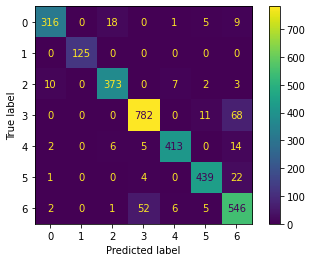

In [37]:
plot_confusion_matrix(rfc, X_test_scaled, y_test_scaled)  